In [1]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob


train_data_directory = 'splitdata2/train'
validation_data_directory = 'splitdata2/validation'
batch_size = 32
# Create data generators for training and validation with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.)

# Prepare the training and validation data with labels
train_generator = train_datagen.flow_from_directory(
    train_data_directory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_data_directory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained DenseNet model without top layers
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add your own classification head on top of the base model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    Dense(11, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the generators for initial training
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

Found 7699 images belonging to 11 classes.
Found 3300 images belonging to 11 classes.
Epoch 1/50
 24/241 [=>............................] - ETA: 52s - loss: 2.2518 - accuracy: 0.2500

C:\Users\ASUS\newgpu\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


241/241 [==============================] - 84s 322ms/step - loss: 0.8202 - accuracy: 0.7658 - val_loss: 0.2652 - val_accuracy: 0.9288
Epoch 2/50
241/241 [==============================] - 76s 316ms/step - loss: 0.3086 - accuracy: 0.9178 - val_loss: 0.1992 - val_accuracy: 0.9415
Epoch 3/50
241/241 [==============================] - 77s 318ms/step - loss: 0.2416 - accuracy: 0.9305 - val_loss: 0.1728 - val_accuracy: 0.9464
Epoch 4/50
241/241 [==============================] - 75s 312ms/step - loss: 0.2053 - accuracy: 0.9390 - val_loss: 0.1565 - val_accuracy: 0.9503
Epoch 5/50
241/241 [==============================] - 78s 323ms/step - loss: 0.1827 - accuracy: 0.9488 - val_loss: 0.1443 - val_accuracy: 0.9536
Epoch 6/50
241/241 [==============================] - 75s 309ms/step - loss: 0.1665 - accuracy: 0.9521 - val_loss: 0.1436 - val_accuracy: 0.9539
Epoch 7/50
241/241 [==============================] - 75s 312ms/step - loss: 0.1619 - accuracy: 0.9482 - val_loss: 0.1272 - val_accuracy: 0.9

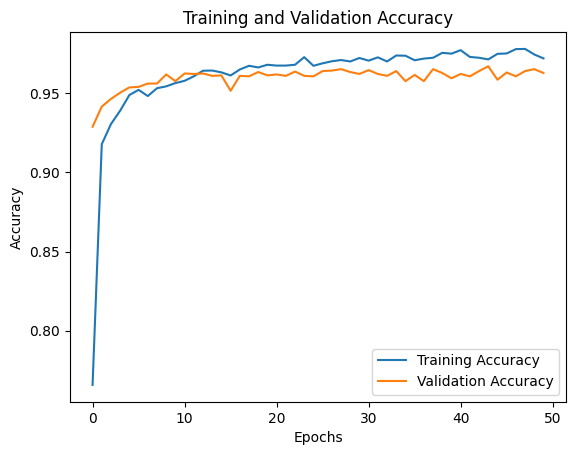

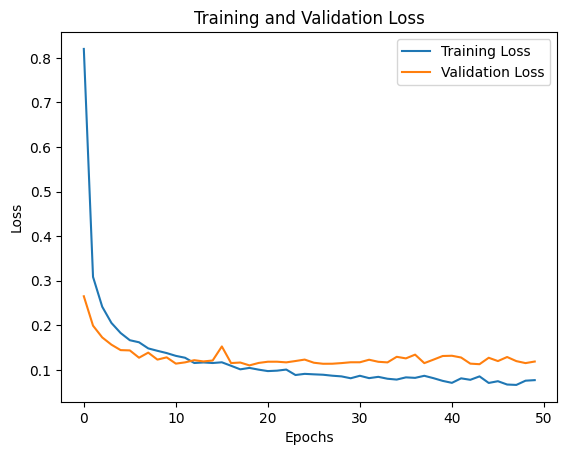

In [2]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy values
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss values
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [3]:
# Save the model in the Keras HDF5 format
model.save("model/accDenseNet v1.3/model v1.3.h5")

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Define the class labels
class_labels = ['Air Conditioner', 'Hair Dryer', 'Iron', 'Lamp','Laptop', 'Oven', 'Refrigerator', 'Rice Cooker',
                'Television', 'Vacuum Cleaner', 'Washing Machine']

# List of image paths
image_paths = [
    'Datatesting/ac.jpg',
    'Datatesting/ac1.jpg',
    'Datatesting/bohlam.jpg',
    'Datatesting/hairdryer.jpg',
    'Datatesting/iron.jpg',
    'Datatesting/kulkas.jpg',
    'Datatesting/lampumeja.jpg',
    'Datatesting/laptop.jpg',
    'Datatesting/mesincuci.jpg',
    'Datatesting/oven.jpg',
    'Datatesting/ricecooker.jpg',
    'Datatesting/tv.jpg',
    'Datatesting/vacum1.jpeg',
    'Datatesting/vacum2.jpeg'
    
]

# Load your trained model
model = tf.keras.models.load_model('model/accDenseNet v1.3/model v1.3.h5')  # Replace with the path to your trained model

# Loop through the image paths
for image_path in image_paths:
    # Load the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the image
    img_array = img_array / 255.0

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_labels[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100  # Confidence in percentage

    # Print the predicted class and confidence
    print('Image:', image_path)
    print('Predicted class:', predicted_class)
    print('Confidence:', confidence, '%')
    print('---')


1/1 [==============================] - 4s 4s/step
Image: Datatesting/ac.jpg
Predicted class: Air Conditioner
Confidence: 86.78698539733887 %
---
1/1 [==============================] - 0s 95ms/step
Image: Datatesting/ac1.jpg
Predicted class: Air Conditioner
Confidence: 99.99964237213135 %
---
1/1 [==============================] - 0s 109ms/step
Image: Datatesting/bohlam.jpg
Predicted class: Lamp
Confidence: 100.0 %
---
1/1 [==============================] - 0s 104ms/step
Image: Datatesting/hairdryer.jpg
Predicted class: Hair Dryer
Confidence: 99.98113512992859 %
---
1/1 [==============================] - 0s 97ms/step
Image: Datatesting/iron.jpg
Predicted class: Iron
Confidence: 100.0 %
---
1/1 [==============================] - 0s 108ms/step
Image: Datatesting/kulkas.jpg
Predicted class: Refrigerator
Confidence: 99.99998807907104 %
---
1/1 [==============================] - 0s 95ms/step
Image: Datatesting/lampumeja.jpg
Predicted class: Lamp
Confidence: 99.98944997787476 %
---
1/1 [=====